In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn.utils
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from scipy.stats.mstats import zscore
from sklearn.learning_curve import learning_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

plt.style.use('ggplot')
%matplotlib inline

C:\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
store = pd.read_csv('store.csv').dropna()
store.shape

(365, 10)

In [3]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
10,11,a,c,960.0,11.0,2011.0,1,1.0,2012.0,"Jan,Apr,Jul,Oct"
13,14,a,a,1300.0,3.0,2014.0,1,40.0,2011.0,"Jan,Apr,Jul,Oct"
14,15,d,c,4110.0,3.0,2010.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [4]:
store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1104,1105,c,c,330.0,11.0,2008.0,1,5.0,2013.0,"Feb,May,Aug,Nov"
1105,1106,a,c,5330.0,9.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1106,1107,a,a,1400.0,6.0,2012.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1108,1109,c,a,3490.0,4.0,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"


In [5]:
train = pd.read_csv('train.csv')
#sns.countplot(x='StateHoliday', data=st)

#train.head()
state_hol = pd.get_dummies(train[['StateHoliday']].replace(0, '0'), prefix='StateHoliday')
#state_hol = state_hol.drop(state_hol.columns[1], axis=1)

#state_hol = state_hol.drop(state_hol.index[2], axis=1)
#state_hol.head()
#state_hol[['StateHoliday_0', 'StateHoliday_a']]
train = pd.concat([train, state_hol], axis=1).drop(['StateHoliday'], axis=1)
#train = train.drop(['StateHoliday'], axis=1)
train.head()

C:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,1,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,1,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,1,0,0,0


In [6]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,1,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,1,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,1,0,0,0


In [7]:
train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
1017204,1111,2,2013-01-01,0,0,0,0,1,0,1,0,0
1017205,1112,2,2013-01-01,0,0,0,0,1,0,1,0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,0,1,0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,0,1,0,0
1017208,1115,2,2013-01-01,0,0,0,0,1,0,1,0,0


In [24]:
#train = sklearn.utils.shuffle(train)
#train.head()
#train.iloc[[0]]
#train_part = train[:1000]
#print train.shape
#print train_part.shape

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
210466,847,6,2015-01-24,6077,888,1,0,0,0


In [8]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,5,2015-07-31,5263,555,1,1,1,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,1,1,0,0,0
2,3,5,2015-07-31,8314,821,1,1,1,1,0,0,0
3,4,5,2015-07-31,13995,1498,1,1,1,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,1,1,0,0,0


In [9]:
train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
1017204,1111,2,2013-01-01,0,0,0,0,1,0,1,0,0
1017205,1112,2,2013-01-01,0,0,0,0,1,0,1,0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,0,1,0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,0,1,0,0
1017208,1115,2,2013-01-01,0,0,0,0,1,0,1,0,0


In [10]:
test = pd.read_csv('test.csv').fillna(0)
state_hol = pd.get_dummies(test[['StateHoliday']].replace(0, '0'), prefix='StateHoliday')

test = pd.concat([test, state_hol], axis=1).drop(['StateHoliday'], axis=1)
#train = train.drop(['StateHoliday'], axis=1)
test.head()

print test.shape

(41088, 9)


In [11]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a
0,1,1,4,2015-09-17,1.0,1,0,1,0
1,2,3,4,2015-09-17,1.0,1,0,1,0
2,3,7,4,2015-09-17,1.0,1,0,1,0
3,4,8,4,2015-09-17,1.0,1,0,1,0
4,5,9,4,2015-09-17,1.0,1,0,1,0


In [12]:
test.tail()

,Id,Store,DayOfWeek,Date,Open,Promo,SchoolHoliday,StateHoliday_0,StateHoliday_a
41083,41084,1111,6,2015-08-01,1.0,0,0,1,0
41084,41085,1112,6,2015-08-01,1.0,0,0,1,0
41085,41086,1113,6,2015-08-01,1.0,0,0,1,0
41086,41087,1114,6,2015-08-01,1.0,0,0,1,0
41087,41088,1115,6,2015-08-01,1.0,0,1,1,0


(844338, 12)


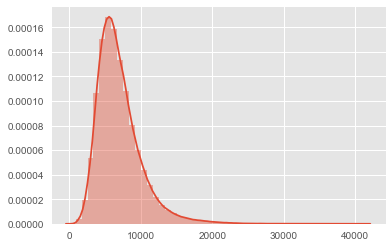

In [11]:
train = train[train.Sales != 0]
print train.shape
sns.distplot(train[['Sales']].dropna())

In [12]:
def RMSPE(y, y_pred):
    res = (((y - y_pred) / y)**2).sum()
    return np.sqrt(res / len(y))

In [ ]:
X = train[['Store','DayOfWeek','Open','Promo', 'SchoolHoliday', \
           'StateHoliday_0', 'StateHoliday_a']]
y = np.ravel(np.array(train[['Sales']]))

#print y.shape

X_TEST = test[['Store','DayOfWeek','Open', 'Promo', 'SchoolHoliday', 'StateHoliday_0', 'StateHoliday_a']]
#print type(X)
#print y
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
#print X_TEST.shape
#X_final = pd.concat([X, X_TEST], axis=0)

#X_final.shape

#parameters = {'max_depth':[4, 50, 100]}
rf = RandomForestRegressor(n_estimators=300, criterion='mae', n_jobs=2)#linear_model.LinearRegression()
#regr = GridSearchCV(rf, parameters)
#print X_TEST

rf.fit(X, y)
#y_pred = list(rf.predict(X))#[:,np.newaxis]
y_pred_TEST = list(int(e) for e in rf.predict(X_TEST))

#print y_pred[:100]
#print y_pred_TEST[:100]
#for e in XX:
#    lr.fit(e, y)
#    y_pred = [sum(x) / 5.0 for x in zip(y_pred, lr.predict(e))]
#    #y_pred_TEST = [int(e) for e in lr.predict(X_TEST)]

#print y_pred_TEST

#print RMSPE(y, y_pred)#
#print 1.0 - RMSPE(y_train, y_pred_TEST)

#train_sizes, train_scores, test_scores = learning_curve(lr, X, y, error_score=RMSPE)
#train_scores_mean = np.mean(train_scores, axis=1)
#train_scores_std = np.std(train_scores, axis=1)
#test_scores_mean = np.mean(test_scores, axis=1)
#test_scores_std = np.std(test_scores, axis=1)

#plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
#plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
#plt.plot(curve)
#plt.show()
#lr.fit(X_train, y_train)
#y_score_test = lr.predict(X_test)
#print y_score_test
#print y_test
#print np.sqrt(mean_squared_error(y_score_test, y_test))

In [138]:
rf.feature_importances_

array([  7.91873429e-01,   5.27597834e-02,   0.00000000e+00,
         1.52364368e-01,   2.12292151e-03,   6.00833784e-04,
         2.78664277e-04])

In [142]:
Id = [i for i in xrange(1, len(y_pred_TEST) + 1)]
res = pd.DataFrame(np.matrix([Id, y_pred_TEST]).transpose(), columns=['Id', 'Sales'])
res.to_csv('D:\\res.csv', index=False)